In [1]:

! pip install optuna -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 4.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [3]:
#load data
data = pd.read_csv('datos_estandarizados_2.csv')
data.head()


,tenure,age,marital,address,income,ed,reside,custcat
0,-1.055125,0.210526,1.010051,0.000000,0.314815,1.087753,0.0,1
1,-1.148806,-0.368421,1.010051,-0.133333,1.648148,1.906227,2.0,4
2,1.521092,0.631579,1.010051,1.000000,1.277778,-1.367671,0.0,3
3,-0.118319,-0.368421,-0.990050,0.200000,-0.259259,-0.549196,-0.5,1
4,-0.586722,-0.526316,1.010051,0.000000,-0.314815,-1.367671,1.0,3


In [4]:
#Análisis básico de datos
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tenure   1000 non-null   float64
 1   age      1000 non-null   float64
 2   marital  1000 non-null   float64
 3   address  1000 non-null   float64
 4   income   1000 non-null   float64
 5   ed       1000 non-null   float64
 6   reside   1000 non-null   float64
 7   custcat  1000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB
None
             tenure          age       marital      address       income  \
count  1.000000e+03  1000.000000  1.000000e+03  1000.000000  1000.000000   
mean  -1.669775e-16     0.088632 -2.664535e-18     0.170067     0.565463   
std    1.000500e+00     0.660990  1.000500e+00     0.672445     1.982299   
min   -1.617209e+00    -1.157895 -9.900495e-01    -0.600000    -0.703704   
25%   -8.677637e-01    -0.421053 -9.900495e-01    -0.400000    -0.333333   
50%

In [5]:
data.shape

(1000, 8)

In [7]:
# Separar características y variable objetivo (Separate features and target variable)
X = data.drop('custcat', axis=1)
y = data['custcat']

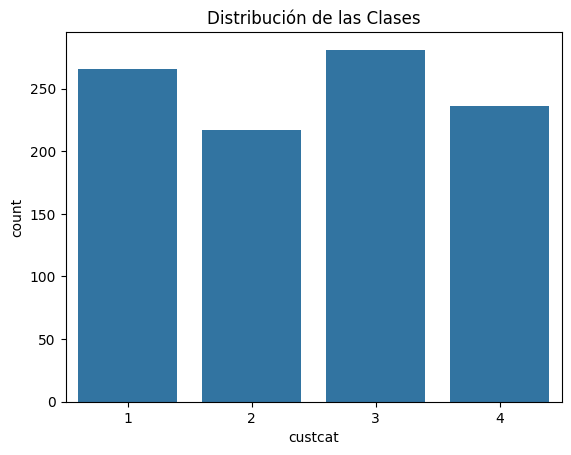

In [8]:
 #Visualización inicial
sns.countplot(x=y)
plt.title("Distribución de las Clases")
plt.show()

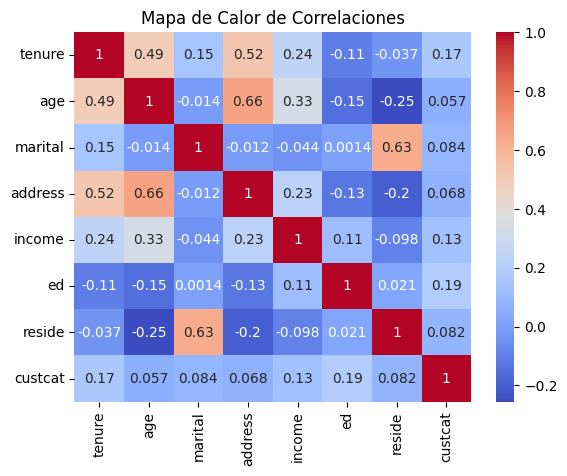

In [9]:
# Correlación entre las características numéricas
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlaciones")
plt.show()


In [10]:
data.columns

Index(['tenure', 'age', 'marital', 'address', 'income', 'ed', 'reside',
       'custcat'],
      dtype='object')

In [11]:
# Separar características y variable objetivo
X = data.drop('custcat', axis=1)
y = data['custcat']

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=250)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
ac1 = accuracy_score(y_test, y_pred)
print(ac1)




0.37333333333333335


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
ac2 = accuracy_score(y_test, y_pred)
print(ac2)

0.3433333333333333


In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
ac3 = accuracy_score(y_test, y_pred)

print(ac3)

0.3566666666666667


In [16]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=250)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
ac4 = accuracy_score(y_test, y_pred)
print(ac4)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.37


In [17]:
names = ["KNN", "RF", "DT", "ADA"]
scores = [ac1, ac2, ac3, ac4]

models = pd.DataFrame({"Model": names, "Score": scores})
models.head()

,Model,Score
0,KNN,0.373333
1,RF,0.343333
2,DT,0.356667
3,ADA,0.370000
